# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

# Import Necessary Dependencies

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [5]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
import scipy.stats as st
import numpy as np
import seaborn as sns

df = pd.read_csv('data/human_body_temperature.csv')


In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### 1. Is the distribution of body temperatures normal?
Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test

### Visual Normality Checks: Graphical Distributions of the dataset can show some level of normality. Here, we see:

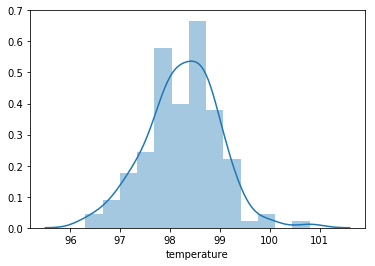

In [6]:
sns.distplot(df['temperature'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a15231e80>]], dtype=object)

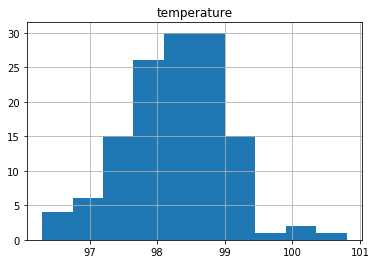

In [7]:
pd.DataFrame.hist(df, column='temperature')

### Both these graphical distributions show that the data looks somewhat normally distributed. However, just to be sure, normality tests will be used to determine if the distribution is actually normal: 

By performing a normal distribution test from Scipy:

Hypothesis: The distribution of temperatures is normal

Null hypothesis: The distribution of temperatures is not normal 

In [15]:
body_temp = df['temperature']
st.normaltest(body_temp)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

Since the P-value is greater than 0.05, the null hypothesis can be rejected with confidence. In other words, since the null hypothesis can be rejected, our hypothesis is correct in that 
the Distribution of temperatures is normal. 

### 2. Is the sample size large? Are the observations independent?
Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.

In [8]:
df.info

<bound method DataFrame.info of      temperature gender  heart_rate
0           99.3      F        68.0
1           98.4      F        81.0
2           97.8      M        73.0
3           99.2      F        66.0
4           98.0      F        73.0
5           99.2      M        83.0
6           98.0      M        71.0
7           98.8      M        78.0
8           98.4      F        84.0
9           98.6      F        86.0
10          98.8      F        89.0
11          96.7      F        62.0
12          98.2      M        72.0
13          98.7      F        79.0
14          97.8      F        77.0
15          98.8      F        83.0
16          98.3      F        79.0
17          98.2      M        64.0
18          97.2      F        68.0
19          99.4      M        70.0
20          98.3      F        78.0
21          98.2      M        71.0
22          98.6      M        70.0
23          98.4      M        68.0
24          97.8      M        65.0
25          98.0      F        8

#The dataset contains 130 values. The question asks if this number is big enough 

In [18]:
len(df)

130

The central limit theorem states that if sample size are large enough, the distribution will be approximately normal. 

### 3. Is the true population mean really 98.6 degrees F?
First, try a bootstrap hypothesis test.
Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the  tt  or  zz  statistic?
Now try using the other test. How is the result be different? Why?

A one-sample test would be used here because 98.6 degrees F is an accepted (and is assumed to be the population mean)

In order to conduct a one sample t-test, we should create a hypothesis statement:

Null Hypothesis: The population mean is 98.6 degrees F. [no difference in mean]

Alternate hypothesis: The population mean is less than 98.6 degrees F.

In [17]:
st.ttest_1samp(df['temperature'], popmean=98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

Every t-value has a p-value to go with it. A p-values is the probability that the results from your sample data occurred by chance. Low p-values are good and indicate that the data did not occur by chance. The p-value is 0.0000002411 (which is a very small percentage that the results happened by chance), and so we can reject the null hypothesis and the population mean is less than 98.6 degrees F. 

In this situation, even though the sample size is over 30, we do not know the standard deviation. Therefore, it is best to to use the t-test

### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?

### 5. At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [30]:
print(df.temperature.mean())

low_temp, high_temp = st.norm.interval(0.95, loc=df.temperature.mean(), scale=df.temperature.std())

print(low_temp, high_temp)

margin_of_error = float(df.temperature.mean()- low_temp)
print(margin_of_error)

98.24923076923078
96.8122181854 99.6862433531
1.4370125838276664


The numbers show that if the temperature goes lower than 96.81 or higher than 98.25, then it is considered abnormal. Also, we can say that we are 95% confident that the human body temperature is 98.25 ± 1.44 F  

### 6. Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.

Because there is a difference between the mean temperatures of males and females in the sample, it is natural to ask if this difference is statistically significant. A 2-sample t-test yield a t-statistic of 2.29 (p=.024)

Before we determine if there is a significant difference between males and females, we will figure out the sample means of both genders. 

In [22]:
male_df = df[df['gender'] == 'M']
female_df = df[df['gender'] == 'F']
print(male_df.mean())
print(female_df.mean())

temperature    98.104615
heart_rate     73.369231
dtype: float64
temperature    98.393846
heart_rate     74.153846
dtype: float64


We find that the mean temperature of males is around 98.10 and the mean temperature of females is around 98.39. While they seem different, the next step is to conduct a two-sample t-test to determine if male body temperatures are significantly different compared to female body temperatures. 

Null Hypothesis: Males and females have the same body temperature (no differencein means)

Alternate hypothesis: Males and females have different body temperatures (difference in means)

Test results: 

In [24]:
st.ttest_ind(male_df['temperature'], female_df['temperature'])

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

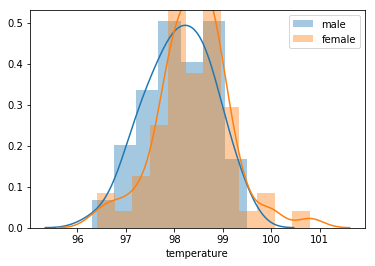

In [26]:
sns.distplot(male_df['temperature'], label='male') 
sns.distplot(female_df['temperature'], label='female')
plt.legend()
plt.show()